202258081이재석

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams['font.size'] = 13
plt.ion()

In [3]:
def f(z):
    return np.square(z) - 1

f(0)

-1

In [4]:
z = [4, 1-0.2j, 1.6]
f(z)

array([15.  +0.j , -0.04-0.4j,  1.56+0.j ])

In [5]:
x, y = np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))

In [6]:
mesh = (y * 1j) + x
mesh

array([[-10.        -10.j        ,  -8.94736842-10.j        ,
         -7.89473684-10.j        ,  -6.84210526-10.j        ,
         -5.78947368-10.j        ,  -4.73684211-10.j        ,
         -3.68421053-10.j        ,  -2.63157895-10.j        ,
         -1.57894737-10.j        ,  -0.52631579-10.j        ,
          0.52631579-10.j        ,   1.57894737-10.j        ,
          2.63157895-10.j        ,   3.68421053-10.j        ,
          4.73684211-10.j        ,   5.78947368-10.j        ,
          6.84210526-10.j        ,   7.89473684-10.j        ,
          8.94736842-10.j        ,  10.        -10.j        ],
       [-10.         -8.94736842j,  -8.94736842 -8.94736842j,
         -7.89473684 -8.94736842j,  -6.84210526 -8.94736842j,
         -5.78947368 -8.94736842j,  -4.73684211 -8.94736842j,
         -3.68421053 -8.94736842j,  -2.63157895 -8.94736842j,
         -1.57894737 -8.94736842j,  -0.52631579 -8.94736842j,
          0.52631579 -8.94736842j,   1.57894737 -8.94736842j,
       

In [7]:
output = np.abs(f(mesh))
output

array([[200.00249998, 180.16891204, 162.56186183, 147.17961999,
        134.01873672, 123.07358959, 114.33622352, 107.7967979 ,
        103.44488499, 101.27153785, 101.27153785, 103.44488499,
        107.7967979 , 114.33622352, 123.07358959, 134.01873672,
        147.17961999, 162.56186183, 180.16891204, 200.00249998],
       [179.94737695, 160.11392613, 142.51023925, 127.13547771,
        113.98681334, 103.05855538,  94.34149584,  87.82304255,
         83.48877541,  81.32559793,  81.32559793,  83.48877541,
         87.82304255,  94.34149584, 103.05855538, 113.98681334,
        127.13547771, 142.51023925, 160.11392613, 179.94737695],
       [162.09770634, 142.26121806, 124.65775066, 109.28788896,
         96.15018387,  85.2396981 ,  76.54644979,  70.05464703,
         65.74414657,  63.5951671 ,  63.5951671 ,  65.74414657,
         70.05464703,  76.54644979,  85.2396981 ,  96.15018387,
        109.28788896, 124.65775066, 142.26121806, 162.09770634],
       [146.45510629, 126.6114754 , 1

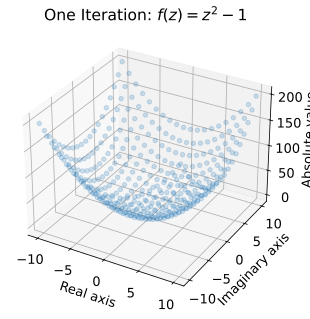

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')      # 실수부
ax.set_ylabel('Imaginary axis') # 허수부
ax.set_zlabel('Absolute value') # 함수값의 절대값
ax.set_title('One Iteration: $f(z) = z^2 - 1$');

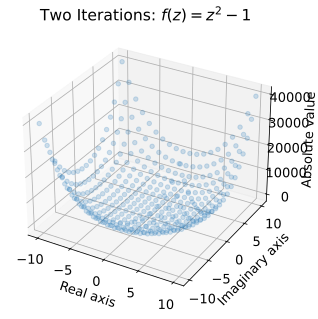

In [9]:
output = np.abs(f(f(mesh))) # 함수 두 번 반복

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$');

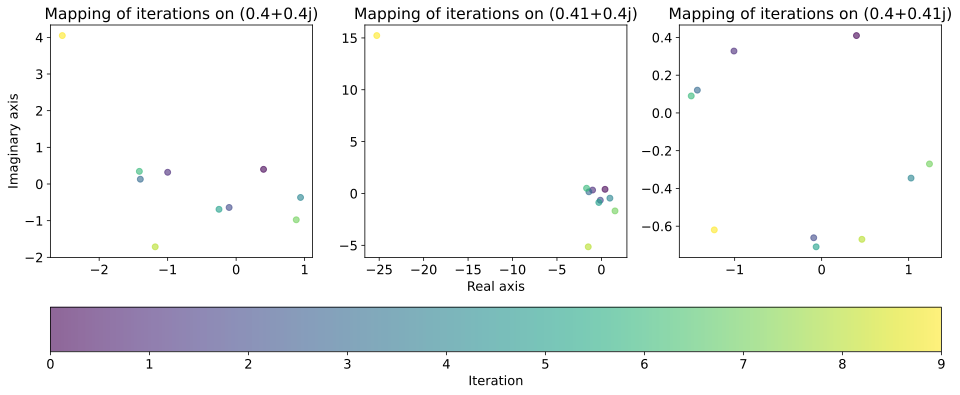

In [10]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros(
    (num_iter+1, selected_values.shape[0]),  # 10X3 Zero 배열 생성
    dtype=complex  # 데이터 타입: 복소수
)
outputs[0] = selected_values   # 함수 초기 조건

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])  # 10번 함수 반복하는 동안 각 결과를 저장

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(
        data.real,  # 실수부
        data.imag,  # 허수부
        c=range(data.shape[0]), 
        alpha=0.6
    )
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location='bottom', label='Iteration');

In [11]:
def divergence_rate(mesh, num_iter=10, radius=2):

    z = mesh.copy()
    # 값 별 반복 횟수를 저장
    diverge_len = np.zeros(mesh.shape)

    # 발산되지 않은 값들에 대해 함수를 반복 적용
    for i in range(num_iter):
        # [+] 1. Boolean 배열  마스크 생성
        conv_mask = z < radius

        # [+] 2. 해당 값들에 대한 diverge_len 값 증가
        diverge_len[conv_mask] += 1

        # [+] 3. 해당 값들에 대해 함수 적용
        z[conv_mask] = f(z[conv_mask])
    return diverge_len

C:\Users\InFo\AppData\Local\Temp\ipykernel_9512\665950123.py:2: RuntimeWarning: overflow encountered in square
  return np.square(z) - 1


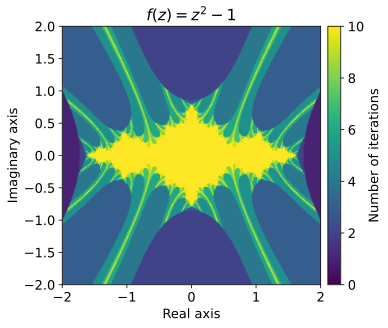

In [12]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2-1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');